<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/8_2_Correlation_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively
---
This worksheet has a set of exercises for practising using the linregress function.  The function will run a linear regression algorithm (or model) to produce data that can be used for predictions.

### Exercise 1 - Clean the data 
---
Using the positive psychology dataset - "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
* Read the data and display info 
* Visually check the summary to see which columns have null values
* Remove columns with a significant number of null values

**Expected Output**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
```

In [3]:
import pandas as pd

def clean_data(df):
  
  df.drop_duplicates()
  #Remove columns with a significant number of null values 
  df = df.dropna(axis=1)
  display(df)
  return df

url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'
psycho_df = pd.read_csv(url)
clean_psycho_df = clean_data(psycho_df)

,Age,English,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017
5,24,Your Second Language,Male,Outside Europe,2.0,4.40,34,25,21,19,13,17,2017
6,22,Your Second Language,Female,Outside Europe,0.0,4.30,37,22,21,19,8,30,2017
7,36,Your Second Language,Female,Outside Europe,0.5,3.33,41,25,26,18,12,4,2017
8,22,Your Second Language,Female,Outside Europe,0.0,2.60,29,20,28,20,10,20,2017
9,22,Your Second Language,Female,Outside Europe,0.0,2.40,35,24,19,19,17,24,2017


### Exercise 2 - Check for outliers 
---
We briefly mentioned outliers in the R and stats presentation. An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results. 

A value is considered to be an outlier if it is any of:
*  greater than `Q3 + 1.5 * interquartile_range`
*  less than `Q1 - 1.5 * interquartile_range`
*  more than 2 standard deviations from the mean

Q3 = value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot, in which:

*  the upper line on the boxplots arm (whisker) is `Q3 + 1.5 * IQR`
*  the lower line on the boxplots arm (whisker) is `Q1 - 1.5 * IQR`
*  the middle line of the box is the median
*  the top of the box is Q3
*  the bottom of the box is Q1
*  outliers are shown as circles or dots, either above or below the whiskers

1. Using either matplotlib or Seaborn, create a boxplot of `Wellbeing` and a separate boxplot of `selfesteem`
2. use `plt.show()` to separate the graphs 
3. Can you see any outliers? Are they high or low?

**Expected Output**

https://docs.google.com/presentation/d/e/2PACX-1vQBji5MrvtdeXCtP2PJzhPLKqXXuLMYjy4nCIzXpJLoye38IzetN5amZd6pU9e4io3bTUvE6Slg_hIk/pub?start=false&loop=false&delayms=3000


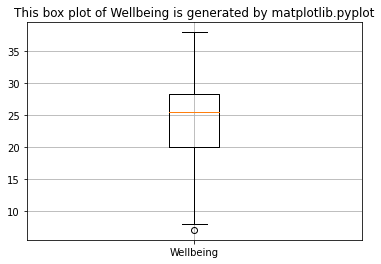

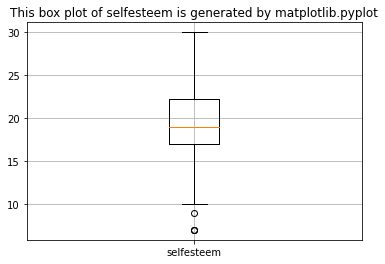

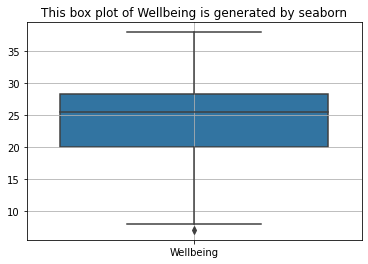

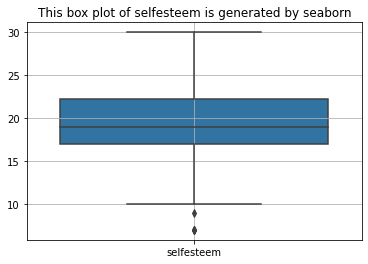

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_boxplot_matplotlib(df,col):
  #print(f"This box plot of {col} is generated by matplotlib.pyplot")
  data = df[col]
  plt.boxplot(data, labels=[col])
  plt.title(f"This box plot of {col} is generated by matplotlib.pyplot")
  plt.grid()

  plt.show()


def show_boxplot_seaborn(df,col):
  new_df = df[col]
  labels = [col]
  chart = sns.boxplot(data=new_df)
  chart.set_xticklabels(labels)
  chart.set_title(f"This box plot of {col} is generated by seaborn")
  chart.grid()
  plt.show()

show_boxplot_matplotlib(clean_psycho_df,'Wellbeing')
show_boxplot_matplotlib(clean_psycho_df,'selfesteem')
#print("Q3 ")
show_boxplot_seaborn(clean_psycho_df,'Wellbeing')
show_boxplot_seaborn(clean_psycho_df,'selfesteem')

### Exercise 3 - Removing outliers
---
Create a function called `remove_outliers(df, column)` to remove outliers from a given column in a given dataframe.  Use the function to remove outliers from the `Wellbeing` column.  Then use the function to remove the outliers from the `selfesteem` columns. 

The function will:

1. Store the values for Q1 and Q3 in 2 separate variables   *Hint: you can use `.quantile(0.75)` and `.quantile(0.25)` to get Q3 and Q1 respectively*  
2. Calculate the interquartile range(IQR) using `Q3` - `Q1`  
3. Create a variable which will store the value for the `upper_limit` (`Q3 + 1.5 * IQR`)  
4. Create another variable which assigns the value for the `lower_limit` (`Q1  - 1.5 * IQR`)  
5. Filter all rows where values are NOT outliers into a new dataframe called `df_normal`
6. Return `df_normal`

Run the function twice, once for each column.
Show the info for the resulting dataframe

**Test output**:  
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          41 non-null     int64  
 1   English      41 non-null     object 
 2   sex          41 non-null     object 
 3   origin       41 non-null     object 
 4   Ukresidence  41 non-null     float64
 5   MAAS         41 non-null     float64
 6   Resilliance  41 non-null     int64  
 7   Wellbeing    41 non-null     int64  
 8   Stress       41 non-null     int64  
 9   selfesteem   41 non-null     int64  
 10  LoC          41 non-null     int64  
 11  sleep        41 non-null     int64  
 12  Year         41 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.5+ KB
```


In [6]:
from scipy.stats import zscore,iqr
import numpy as np

def remove_outliers(df, column):
  #display(df)
  Q3 = df[column].quantile(0.75)
  Q1 = df[column].quantile(0.25)
  # iqr = q3 - q1 #interquartile range(IQR) 
  IQR = Q3 - Q1
  #Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  #Filter all rows where values are NOT outliers into a new dataframe called df_normal
  df_normal = df[(df[column]< upper_limit) & (df[column] >lower_limit)] # or 2*stddev()> mean()
  
  return df_normal

  #theiqr = iqr(df[column]) #, axis=1)
  #print("theiqr=",theiqr)
  #calculate z-scores of `df`
  #Z-Score method for Outlier Removal
  # z_scores = zscore(df[column]) #df['z_score']= zscore(df[column])
  # print("z_scores=",z_scores)
  # abs_z_scores = np.abs(z_scores)
  # filtered_entries = (abs_z_scores < 3).all(axis=1)
  # df_normal = df[filtered_entries]


print("-------------remove outer from Wellbeing--------------")
remove_outler_wellbeing= remove_outliers(clean_psycho_df, 'Wellbeing')
print(remove_outler_wellbeing)
print("-------------remove outer from selfesteem--------------")
remove_outler_selfesteem = remove_outliers(clean_psycho_df, 'selfesteem') #.info())
print(remove_outler_selfesteem)

-------------remove outer from Wellbeing--------------
    Age                                            English  ... sleep  Year
0    24                               Your Second Language  ...    32  2017
1    22                               Your Second Language  ...    10  2017
2    26                               Your Second Language  ...    24  2017
3    23                               Your Second Language  ...    10  2017
4    25                               Your Second Language  ...    17  2017
5    24                               Your Second Language  ...    17  2017
6    22                               Your Second Language  ...    30  2017
7    36                               Your Second Language  ...     4  2017
8    22                               Your Second Language  ...    20  2017
9    22                               Your Second Language  ...    24  2017
10   23                               Your Second Language  ...    18  2017
11   22                          

### Exercise 4 - Checking for normality
---

Linear regressions assume that the data is normally distributed (Gaussian) and therefore has the bell curved shape and a similar mean and median (this would be true if the mean was centred like it is in Gaussian data). 

1. Use Seaborn's **distplot** to check the shape of the `Wellbeing` and `selfesteem` columns.  Do they look normally distributed (Gaussian)?

`sns.distplot(dataframe['column'])`

*Hint: if you add, `bins= ...` as a parameter, you can set the number of bins (bars) in your chart*

2. Compare the mean and median of `Wellbeing` - are they similar? 
3. Compare the mean and median of `selfesteem` - are they similar?





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


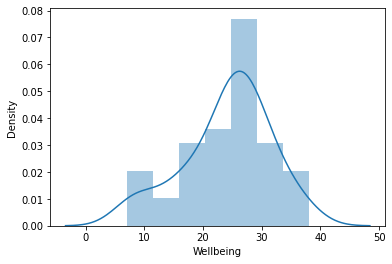

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean wellbeing=24.113636363636363 , median wellbeing = 25.5
the both mean and median of wellbeing are very close, so they are similar.
----------------------------------------------------------------------------


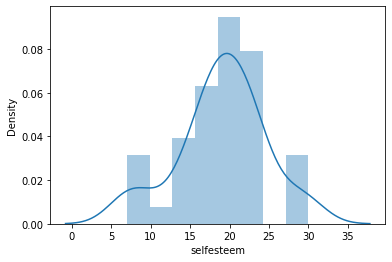

mean selfesteem=19.022727272727273 , median selfesteem = 19.0
the both mean and median of selfesteem are very close, so they are similar.


In [7]:
# def check_normality(df,col1,col2):
#   shape_col1 = sns.distplot(df[col1],bins=2)
#   shape_col2 = sns.distplot(df[col2],bins=2)
  # print(shape_col1)
  # print(shape_col2)

def check_normality(df,column):
  sns.distplot(df[column])
  plt.show()

def cal_mean(df,column):
  return df[column].mean()


def cal_median(df,column):
  #median_column = df.loc[:,column].median()
  return df[column].median()


check_normality(clean_psycho_df, 'Wellbeing')
mean_wellbeing=cal_mean(clean_psycho_df,'Wellbeing')
median_wellbeing = cal_median(clean_psycho_df,'Wellbeing')
print(f'mean wellbeing={mean_wellbeing} , median wellbeing = {median_wellbeing}')
print(f'the both mean and median of wellbeing are very close, so they are similar.')


print('----------------------------------------------------------------------------')
check_normality(clean_psycho_df, 'selfesteem')
mean_selfesteem=cal_mean(clean_psycho_df,'selfesteem')
median_selfesteem = cal_median(clean_psycho_df,'selfesteem')
print(f'mean selfesteem={mean_selfesteem} , median selfesteem = {median_selfesteem}')
print(f'the both mean and median of selfesteem are very close, so they are similar.')


### Exercise 5 - Check which variables are most highly correlated
---
Using the `dataframe.corr()` function and Seaborn's heatmap, create a correlation heatmap matrix to check which variables are most highly correlated.

A correlation matrix finds the correlation coefficient between every variable pair combination in a set of variables.  A correlation heatmap shows the degree of correlation between variables using a colour scale.

*The matrix and heatmap will always show the correlation coefficients between each variable and itself, which will have a correlation coefficient of 1.*
  
Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated


Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated

1. create the correlation matrix assigning it to a variable called **correlation_matrix** using the .corr() function and rounding to 2 decimal places:

  `correlation_matrix = dataframe.corr().round(2)`

*This will create a matrix similar to the linear regression matrix created in the numpy worksheet, but with more than two variables.*

2. create a heatmap of the correlation matrix using:

 `sns.heatmap(data=data_variable, annot=True)`

*Hint: Use `annot = True` to print the correlation values inside the square*

3. Which variables are the most highly correlated with each other (closest to 1 or -1)?

              Age  Ukresidence  MAAS  ...   LoC  sleep  Year
Age          1.00         0.16  0.21  ...  0.21  -0.04   NaN
Ukresidence  0.16         1.00  0.19  ... -0.08   0.16   NaN
MAAS         0.21         0.19  1.00  ... -0.33   0.38   NaN
Resilliance  0.15         0.12  0.42  ... -0.51   0.43   NaN
Wellbeing    0.11         0.06  0.18  ... -0.45   0.58   NaN
Stress       0.06        -0.17 -0.26  ...  0.42  -0.46   NaN
selfesteem   0.04        -0.10  0.22  ... -0.55   0.53   NaN
LoC          0.21        -0.08 -0.33  ...  1.00  -0.42   NaN
sleep       -0.04         0.16  0.38  ... -0.42   1.00   NaN
Year          NaN          NaN   NaN  ...   NaN    NaN   NaN

[10 rows x 10 columns]
the most highly correlated with each other (closest to 1 or -1):Stress, Loc, sleep and selfesteem, Wellbeing, Resilliance


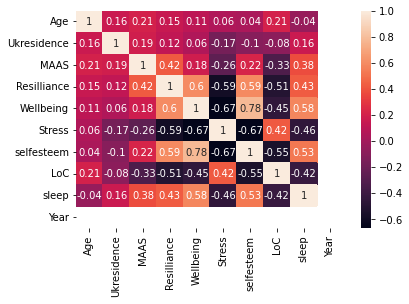

In [8]:
from seaborn import heatmap

correlation_matrix = clean_psycho_df.corr().round(2)
print(correlation_matrix)
#psycho_df = sns.load_dataset(clean_psycho_df)
#psycho = clean_psycho_df.pivot("Age", "Wellbeing", "Stress")
#print(psycho)
# ax = sns.heatmap(flights)
correlation_heatmap = sns.heatmap(data=correlation_matrix, annot=True)

print("the most highly correlated with each other (closest to 1 or -1):Stress, Loc, sleep and selfesteem, Wellbeing, Resilliance")


### Exercise 6 - Linear regression 
---
Using the `linregress` function, perform a linear regression on the Wellbeing and selfesteem columns   
To do this:

1. `from scipy.stats import linregress`
2. create a variable 'x' which stores the Wellbeing column
3. create a variable 'y' which stores the selfesteem column
4. create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
5. display the regression
6. display the slope (regression.slope)
7. display the y-intercept
8. display the r^2 value (rvalue**2)
9. display the pvalue 


In [9]:
from scipy.stats import linregress


def cal_linregress(df,col1,col2):
  x = df[col1]
  y = df[col2]
  regression = linregress(x,y)
  display(regression)
  slope=regression.slope
  intercept= regression.intercept
  rqaure =regression.rvalue**2
  pvalue=regression.pvalue
  print("slope=",regression.slope)
  print("y-intercept=",regression.intercept)
  print("rqaure =",regression.rvalue**2)
  print("pvalue=",regression.pvalue)
  if regression.pvalue < 0.05:
    print(f"p-value {regression.pvalue} < 0.05 model is significant")
  else:
    print(f"p-value {regression.pvalue} >0.05 model is not significant")
  return regression

cal_linregress(clean_psycho_df,'Wellbeing','selfesteem')

LinregressResult(slope=0.5813493777048488, intercept=5.004279778526259, rvalue=0.7796119998459331, pvalue=4.5026632927404693e-10, stderr=0.07205940740749374)

slope= 0.5813493777048488
y-intercept= 5.004279778526259
rqaure = 0.6077948703037752
pvalue= 4.5026632927404693e-10
p-value 4.5026632927404693e-10 < 0.05 model is significant


LinregressResult(slope=0.5813493777048488, intercept=5.004279778526259, rvalue=0.7796119998459331, pvalue=4.5026632927404693e-10, stderr=0.07205940740749374)

### Exercise 7 - understanding the output 
---
The r^2 value (rvalue**2) helps us understand how much our independent variable (x) is predicting our dependent variable (y). The closer to 1 the rvalue is the more  the change in Y is explained by X. So an rvalue of 0.7 means that 70% of Y's variance can be explained by X. 

Our pvalue shows how significant our model is, if the pvalue is < 0.05 then the model is significant. 

On this basis, write below the findings of the above regression.
* is the model significant?
* how much is the change in y explained by x? 

**Write about the findings here**: 


*   is the model significant? 

    p-value 4.5026632927404693e-10 < 0.05  the model is significant

*   how much is the change in y explained by x?  
rqaure = 0.6077948703037752 The closer to 1 the rvalue is the more the change in Y is explained by X.
    rvalue of 0.6 means that 60% of Y's variance can be explained by X.


    










### Exercise 8 - Linear regression with other variables 
---

Referring back to the correlation heatmap..  
*  Repeat Exercise 6 but with the variables that were the most highly correlated according to the heatmap.   
* write a comment comparing the results of this regression with the one you created in exercise 6

In [14]:
#the most highly correlated with each other (closest to 1 or -1):Stress, Loc, sleep and selfesteem, Wellbeing, Resilliance
cal_linregress(clean_psycho_df,'Stress','sleep')
print("p-value 4.5026632927404693e-10 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.20853494503742476 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.2 means that only 20% of Y's variance can be explained by X.")
print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'Stress','selfesteem')
print("p-value 5.791662006152349e-07 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.4520282086578905 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.45 means that only 45% of Y's variance can be explained by X.")
print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'Stress','Wellbeing')
print("p-value 6.084540561441803e-07 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.4507725540176983 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.45 means that only 45% of Y's variance can be explained by X.")

print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'Stress','Resilliance')
print("p-value 2.131844417800603e-05 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.3528296282480892 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.35 means that only 35% of Y's variance can be explained by X.")

print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'sleep','selfesteem')
print("p-value 0.00021460377357025433 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.2810445752976165 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.28 means that only 28% of Y's variance can be explained by X.")

print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'sleep','Wellbeing')
print("p-value 3.748572109178585e-05 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.33589272459076536 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.33 means that only 33% of Y's variance can be explained by X.")
print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'sleep','Resilliance')
print("p-value 0.0032214156773408675  < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.18863742549898915 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.18 means that only 18% of Y's variance can be explained by X.")
print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'Wellbeing','Resilliance')
print("p-value 1.871838027341766e-05 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.35667745431563347 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.35 means that only 35% of Y's variance can be explained by X.")
print("--------------------------------------------------------------------------------------------------------")
cal_linregress(clean_psycho_df,'Wellbeing','selfesteem')
print("p-value 4.5026632927404693e-10 < 0.05 the model is significant")
print("how much is the change in y explained by x?")
print("rqaure = 0.6077948703037752 The closer to 1 the rvalue is the more the change in Y is explained by X. ")
print("rvalue of 0.60 means that only 60% of Y's variance can be explained by X.")

LinregressResult(slope=-0.4845443024163428, intercept=31.222061822790334, rvalue=-0.45665626573761664, pvalue=0.001834109597000972, stderr=0.14565832025916503)

slope= -0.4845443024163428
y-intercept= 31.222061822790334
rqaure = 0.20853494503742476
pvalue= 0.001834109597000972
p-value 0.001834109597000972 < 0.05 model is significant
p-value 4.5026632927404693e-10 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.20853494503742476 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.2 means that only 20% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=-0.4688745834976959, intercept=29.178124501666005, rvalue=-0.6723304311556115, pvalue=5.791662006152349e-07, stderr=0.0796578129631363)

slope= -0.4688745834976959
y-intercept= 29.178124501666005
rqaure = 0.4520282086578905
pvalue= 5.791662006152349e-07
p-value 5.791662006152349e-07 < 0.05 model is significant
p-value 5.791662006152349e-07 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.4520282086578905 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.45 means that only 45% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

slope= -0.6279050248852254
y-intercept= 37.713488379900454
rqaure = 0.4507725540176983
pvalue= 6.084540561441803e-07
p-value 6.084540561441803e-07 < 0.05 model is significant
p-value 6.084540561441803e-07 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.4507725540176983 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.45 means that only 45% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=-0.48368821707638454, intercept=45.15806524713169, rvalue=-0.5939946365482514, pvalue=2.131844417800603e-05, stderr=0.10108056303981602)

slope= -0.48368821707638454
y-intercept= 45.15806524713169
rqaure = 0.3528296282480892
pvalue= 2.131844417800603e-05
p-value 2.131844417800603e-05 < 0.05 model is significant
p-value 2.131844417800603e-05 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.3528296282480892 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.35 means that only 35% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=0.3484315362595419, intercept=11.800691793893133, rvalue=0.5301363742449828, pvalue=0.00021460377357025433, stderr=0.08599163164442762)

slope= 0.3484315362595419
y-intercept= 11.800691793893133
rqaure = 0.2810445752976165
pvalue= 0.00021460377357025433
p-value 0.00021460377357025433 < 0.05 model is significant
p-value 0.00021460377357025433 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.2810445752976165 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.28 means that only 28% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=0.5108241889312977, intercept=13.525644083969466, rvalue=0.5795625286289352, pvalue=3.748572109178585e-05, stderr=0.1108321171530626)

slope= 0.5108241889312977
y-intercept= 13.525644083969466
rqaure = 0.33589272459076536
pvalue= 3.748572109178585e-05
p-value 3.748572109178585e-05 < 0.05 model is significant
p-value 3.748572109178585e-05 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.33589272459076536 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.33 means that only 33% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=0.3333134541984733, intercept=27.773139312977097, rvalue=0.4343241019089191, pvalue=0.0032214156773408675, stderr=0.10666495499165107)

slope= 0.3333134541984733
y-intercept= 27.773139312977097
rqaure = 0.18863742549898915
pvalue= 0.0032214156773408675
p-value 0.0032214156773408675 < 0.05 model is significant
p-value 0.0032214156773408675  < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.18863742549898915 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.18 means that only 18% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=0.5200026868564739, intercept=22.1426624828473, rvalue=0.5972247937884306, pvalue=1.871838027341766e-05, stderr=0.10775997927499366)

slope= 0.5200026868564739
y-intercept= 22.1426624828473
rqaure = 0.35667745431563347
pvalue= 1.871838027341766e-05
p-value 1.871838027341766e-05 < 0.05 model is significant
p-value 1.871838027341766e-05 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.35667745431563347 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.35 means that only 35% of Y's variance can be explained by X.
--------------------------------------------------------------------------------------------------------


LinregressResult(slope=0.5813493777048488, intercept=5.004279778526259, rvalue=0.7796119998459331, pvalue=4.5026632927404693e-10, stderr=0.07205940740749374)

slope= 0.5813493777048488
y-intercept= 5.004279778526259
rqaure = 0.6077948703037752
pvalue= 4.5026632927404693e-10
p-value 4.5026632927404693e-10 < 0.05 model is significant
p-value 4.5026632927404693e-10 < 0.05 the model is significant
how much is the change in y explained by x?
rqaure = 0.6077948703037752 The closer to 1 the rvalue is the more the change in Y is explained by X. 
rvalue of 0.60 means that only 60% of Y's variance can be explained by X.


**Comment here**: They all have p-value < 0.05 so all models are significant. 
Stress+selfesteem and Stress+wellbeing have higher r-square values (45%) than others combinations.  Selfesteem and wellbeging are explained by Stress.

selfesteem is explained by Wellbeing
have higher r-square values (60%) than others combinations

### Exercise 9 - Plotting a line of best fit 
---
To create a line of best fit we use y = slope\*x + intercept. 

Using matplotlib (dont forget to import it):

* create a scatter graph between Wellbeing and selfesteem 
* plot a line of best fit using the results in exercise 6  (y = slope * x + intercept)  

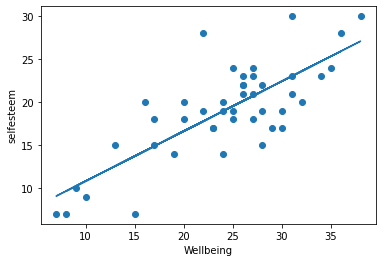

LinregressResult(slope=0.5813493777048488, intercept=5.004279778526259, rvalue=0.7796119998459331, pvalue=4.5026632927404693e-10, stderr=0.07205940740749374)

slope= 0.5813493777048488
y-intercept= 5.004279778526259
rqaure = 0.6077948703037752
pvalue= 4.5026632927404693e-10
p-value 4.5026632927404693e-10 < 0.05 model is significant


LinregressResult(slope=0.5813493777048488, intercept=5.004279778526259, rvalue=0.7796119998459331, pvalue=4.5026632927404693e-10, stderr=0.07205940740749374)

In [12]:

def show_scatterplot(df, col1,col2):
  x = df[col1]
  y = df[col2]
  plt.scatter(x,y)
  plt.xlabel(col1)  
  plt.ylabel(col2)
  regression = linregress(x,y)
  slope = regression.slope
  intercept = regression.intercept
  plt.plot(x,slope*x + intercept)
  plt.show()

show_scatterplot(clean_psycho_df,'Wellbeing','selfesteem')

cal_linregress(clean_psycho_df,'Wellbeing','selfesteem')


*   p-value 4.5026632927404693e-10 < 0.05 the model is significant

*   how much is the change in y explained by x? 
    rqaure = 0.6077948703037752 The closer to 1 the rvalue is the more the change in Y is explained by X. 
    rvalue of 0.60 means that only 60% of Y's variance can be explained by X.







### Exercise 10 - using Seaborn to plot a regression line 
---

Use Seaborn's `regplot` function to create a scatter graph with line of best fit of the variables you used in Exercise 8.

* Compare the 'Wellbeing' and 'selfesteem' graph to the graph you created in Exercise 9

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


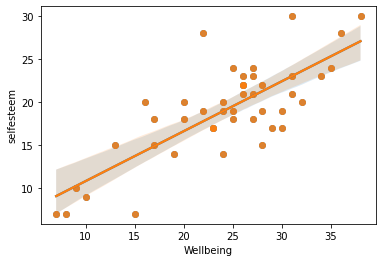

In [15]:
def show_scatter_regressionline(df,col1,col2):
  x = df[col1]
  y = df[col2]
  sns.regplot(x,y)
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel(col1)
  chart.set_ylabel(col2)
  plt.show()
  

show_scatter_regressionline(clean_psycho_df,'Wellbeing','selfesteem')